In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Network
## Session 4: One Hidden Layer, multi-class

- Moons Dataset
- Decision Boundary
- Loss curve

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)

## Setup Global Parameters

In [3]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 10000  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE  = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [4]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [7]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
X, y = iris.data, iris.target

In [11]:
# y = pd.get_dummies(y).to_numpy() # Converting to one-hot-encoding
# y

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
LabelBinarizer?

Init signature: LabelBinarizer(*, neg_label=0, pos_label=1, sparse_output=False)
Docstring:     
Binarize labels in a one-vs-all fashion.

Several regression and binary classification algorithms are
available in scikit-learn. A simple way to extend these algorithms
to the multi-class classification case is to use the so-called
one-vs-all scheme.

At learning time, this simply consists in learning one regressor
or binary classifier per class. In doing so, one needs to convert
multi-class labels to binary labels (belong or does not belong
to the class). `LabelBinarizer` makes this process easy with the
transform method.

At prediction time, one assigns the class for which the corresponding
model gave the greatest confidence. `LabelBinarizer` makes this easy
with the :meth:`inverse_transform` method.

Read more in the :ref:`User Guide <preprocessing_targets>`.

Parameters
----------
neg_label : int, default=0
    Value with which negative labels must be encoded.

pos_label : int, default=

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [17]:
y_test.shape

(30, 3)

In [18]:
# softmax function
def fn_softmax(z):
    '''
    Args:
        z : a matrix of z values of shape (m, n_output)
    returns:
        softmax values of z
    
    '''
    exp_z = np.exp(z)

    return exp_z / np.sum(exp_z, axis =1, keepdims=True ) 

In [19]:
sm = fn_softmax(np.asarray([[8, 5, 0], [-10, 0, 10]]))
#sm.sum(axis=1, keepdims=True).shape
sm.sum(axis=1).shape

(2,)

In [20]:
def fn_activ(z):
    return np.tanh(z)


def fn_activ_prime(a):
    return 1. - np.tanh(a)**2
    

In [21]:
def predict (model, X_p):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    # Layer1
    z1 = X_p.dot(W1) + b1 # Aggregation
    a1 = fn_activ(z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) +b2 # Aggregation
    a2 = fn_softmax(z2) # Activation
    
    return np.argmax(a2, axis=1) # pick index of class with highest
                                 # probability

In [22]:
def calculate_loss (model, X_l, y_l):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    m = X_l.shape[0]
    
    # Layer1
    z1 = X_l.dot(W1) + b1 # Aggregation
    a1 = fn_activ(z1) # Activation

    # Layer 2
    z2 = a1.dot(W2) +b2 # Aggregation
    a2 = fn_softmax(z2) # Activation

    data_loss = -(y_l*np.log( a2 ) + 
                  ( 1 - y_l )* np.log( 1 - a2 ) ).sum() # Binary
    
    return data_loss / m

In [23]:
def build_model(X_tr, y_tr, 
                nn_hdim, nn_out, 
                alpha=ALPHA, epochs = EPOCHS):
    '''
    Args:
        X_tr : Training features
        y_tr : Training labels
        nn_hdim : number of nodes in the hidden layer
        nn_out : size of output
    '''
    m, nn_input_dim = X_tr.shape
    nn_output_dim = nn_out

    # size = 2,4
    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    # size = 4, 2
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    #size  =4
    b1 = np.zeros((1, nn_hdim), dtype = np.float32)
    # size = 2
    b2 = np.zeros((1, nn_output_dim), dtype = np.float32)

    curr_loss = 0

    loss, epoch = [], []

    for i in range (0, epochs):

        ### Forward Propagation

        # Layer1 Mark 3
        z1 = X_tr.dot(W1) + b1 # Aggregation z = X.W +b
        a1 = fn_activ(z1)      # Activation a = g(z)

        # Layer 2 marked 1
        z2 = a1.dot(W2) +b2  # Aggregation z = X.W +b
        a2 = fn_softmax(z2)  # Activation a = g(z)

        ### Back propagation

        # Layer 2
        assert (a2.shape == y_tr.shape), f'check y {a2.shape}/{y_tr.shape}'
        dz2 = a2 - y_tr ## REMEMBER dim of a2 and y to be same dz = a-y

        dW2 = (a1.T).dot(dz2) # dw = a.dz
        assert (W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis = 0, keepdims=True) # db = dz ( sum along the column)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T) # da = W.dz
        assert (a1.shape == da1.shape), f'check b2 {a1.shape}/{da1.shape}'

        # Layer 1 Marked 4
        dz1 = da1 * fn_activ_prime(z1)
        assert (z1.shape == dz1.shape), f'check b2 {z1.shape}/{dz1.shape}'

        dW1 = (X_tr.T).dot(dz1) # dw = a.dz
        assert (W1.shape == dW1.shape), f'check W2 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis = 0, keepdims=True) # db = dz ( sum along the column)
        assert (b1.shape == db1.shape), f'check b2 {b1.shape}/{db1.shape}'

        ### Gradient Update
        W1 += -alpha * dW1 / m
        b1 += -alpha * db1 / m
        W2 += -alpha * dW2 / m
        b2 += -alpha * db2 / m

        model = {'W1' : W1, 'b1' : b1,
                 'W2' : W2, 'b2' : b2
                 }
        
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)

        if i%1000 == 0:
            print (f'After epoch:{i:3d}; loss : {curr_loss: .5f}')

    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    
    return model

In [24]:
loss_hist = {}

In [25]:
nn_out_dim = 3

model = build_model(X_train, y_train, 4, nn_out_dim)

After epoch:  0; loss :  1.95957
After epoch:1000; loss :  0.11608
After epoch:2000; loss :  0.09508
After epoch:3000; loss :  0.09023
After epoch:4000; loss :  0.08843
After epoch:5000; loss :  0.08760
After epoch:6000; loss :  0.08714
After epoch:7000; loss :  0.08686
After epoch:8000; loss :  0.08668
After epoch:9000; loss :  0.08654


In [26]:
model['b2'].shape

(1, 3)

<Axes: xlabel='epoch'>

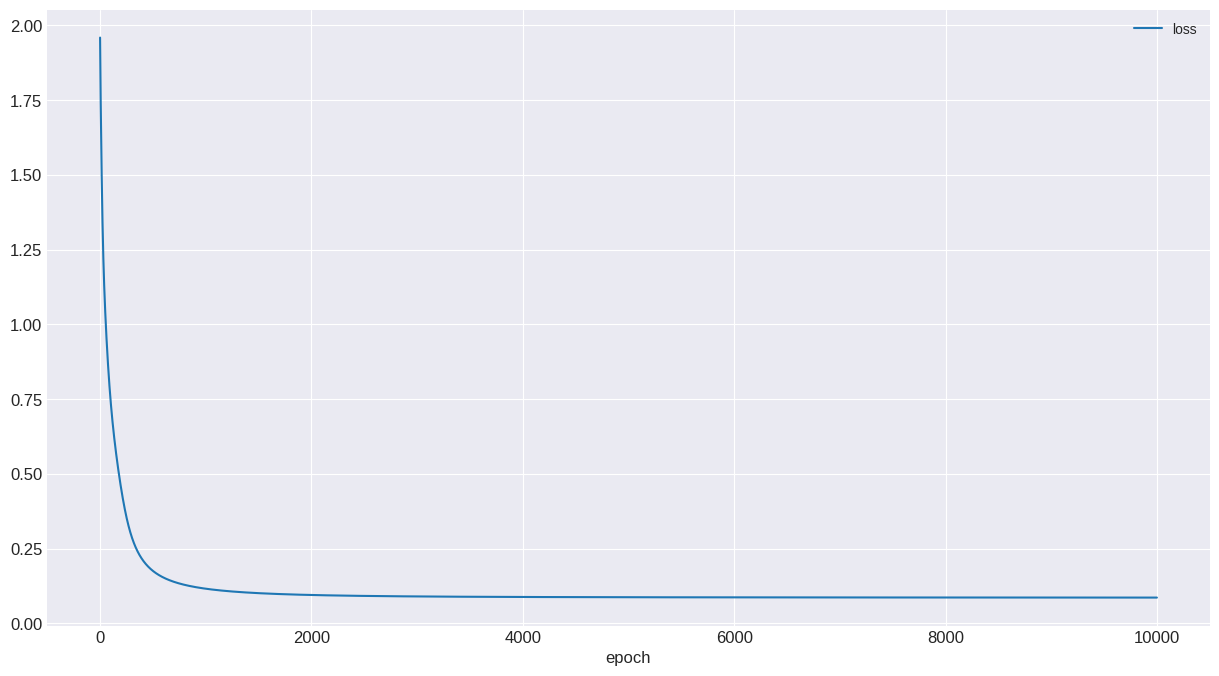

In [27]:
pd.DataFrame(loss_hist).plot(x = 'epoch')

In [28]:
# X = X_train
# fig, ax = plt.subplots() # instantiation of plt objects
# dm = 0.005 # spacing of the grid
# x_min, x_max = X[:, 0].min() - 0.05 ,X[:, 0].max() + 0.05
# y_min, y_max = X[:, 1].min() - 0.05 ,X[:, 1].max() + 0.05
# xx,yy = np.meshgrid(np.arange(x_min, x_max, dm), 
#                     np.arange(y_min, y_max, dm)) # generate a mesh
# XX = np.c_[xx.ravel(), yy.ravel()] # prepare feature data

# y_pred = predict(model, XX)

# Z = np.array(y_pred).reshape(xx.shape)

# ax.contourf(xx,yy, Z, cmap=CMAP, alpha = 0.8)

# ax.scatter(X[:, 0], X[:, 1], c = y_train.argmax(axis = 1), 
#            edgecolors='k', 
#            cmap = plt.cm.bwr)

## Train data

In [29]:
y_pred = predict(model, X_train)
accuracy_score(y_train.argmax(axis = 1), y_pred)

0.9833333333333333

In [30]:
y_pred = predict(model, X_test)
accuracy_score(y_test.argmax(axis = 1), y_pred)

1.0

In [31]:
cm = confusion_matrix(y_test.argmax(axis = 1), y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

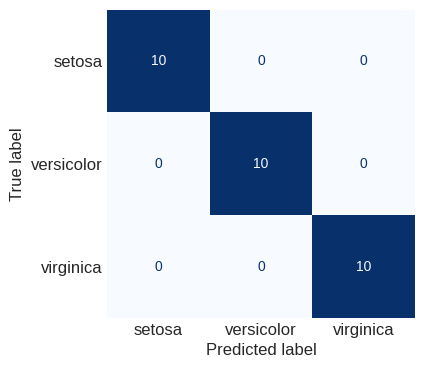

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris.target_names)

fig, ax = plt.subplots(figsize=(4,4))

disp.plot(ax = ax, cmap='Blues', colorbar=False);
ax.grid(False);